In [ ]:
import numpy as np

# plotting 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# data manager and analysis
import vodex as vx
import numan as nu

# writing files
import tifffile as tif

# Define experiment: 

In [ ]:
blank = vx.Condition(vx.Stimulus('blank','blank'))
dot2 = vx.Condition(vx.Stimulus('2dot','2dot'))
dot5 = vx.Condition(vx.Stimulus('5dot','5dot'))

spec = {}
spec['conditions'] = [blank,dot2,
              blank,dot5]
spec['timing'] = np.array([6,1,
                   6,1])*52 # in frames
spec['project_dir'] = "D:/Code/repos/numerosity_2/data/raw/img/20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1/"
spec['frames_per_volume'] = 52

experiment = vx.Experiment.from_dic(spec)
experiment.summary()

Total of 9 files.
Check the order :
[ 0 ] 20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1_MMStack_Pos0.ome.tif : 8910 frames
[ 1 ] 20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1_MMStack_Pos0_1.ome.tif : 8909 frames
[ 2 ] 20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1_MMStack_Pos0_2.ome.tif : 8909 frames
[ 3 ] 20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1_MMStack_Pos0_3.ome.tif : 8909 frames
[ 4 ] 20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1_MMStack_Pos0_4.ome.tif : 8909 frames
[ 5 ] 20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1_MMStack_Pos0_5.ome.tif : 8909 frames
[ 6 ] 20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1_MMStack_Pos0_6.ome.tif : 8909 frames
[ 7 ] 20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1_MMStack_Pos0_7.ome.tif : 8909 frames
[ 8 ] 20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1_MMStack_Pos0_8.ome.tif : 1527 frames

Cycle length: 728
Condition ['blank']: for 312 frames
Condition ['2dot']: for 52 frames
Condition ['blank']: for 312 frames
Condition ['5dot']: for 52 frames

Total cycles (ceil): 100
Total f

# Create dff movie

In [ ]:
save_dir = 'D:/Code/repos/numerosity_2/data/processed/img/20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1//dff/'
batch_size = 25 # in volumes
window_size = 15 # in volumes
nu.Preprocess(experiment).batch_dff(save_dir,batch_size, window_size, verbose=True )

### Now set the dff as data : 

In [41]:
spec['project_dir'] = 'D:/Code/repos/numerosity_2/data/processed/img/20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1//dff/'
experiment = vx.Experiment.from_dic(spec)
experiment.summary()

Total of 126 files.
Check the order :
[ 0 ] dff_movie_0000.tif : 936 frames
[ 1 ] dff_movie_0001.tif : 572 frames
[ 2 ] dff_movie_0002.tif : 572 frames
[ 3 ] dff_movie_0003.tif : 572 frames
[ 4 ] dff_movie_0004.tif : 572 frames
[ 5 ] dff_movie_0005.tif : 572 frames
[ 6 ] dff_movie_0006.tif : 572 frames
[ 7 ] dff_movie_0007.tif : 572 frames
[ 8 ] dff_movie_0008.tif : 572 frames
[ 9 ] dff_movie_0009.tif : 572 frames
[ 10 ] dff_movie_0010.tif : 572 frames
[ 11 ] dff_movie_0011.tif : 572 frames
[ 12 ] dff_movie_0012.tif : 572 frames
[ 13 ] dff_movie_0013.tif : 572 frames
[ 14 ] dff_movie_0014.tif : 572 frames
[ 15 ] dff_movie_0015.tif : 572 frames
[ 16 ] dff_movie_0016.tif : 572 frames
[ 17 ] dff_movie_0017.tif : 572 frames
[ 18 ] dff_movie_0018.tif : 572 frames
[ 19 ] dff_movie_0019.tif : 572 frames
[ 20 ] dff_movie_0020.tif : 572 frames
[ 21 ] dff_movie_0021.tif : 572 frames
[ 22 ] dff_movie_0022.tif : 572 frames
[ 23 ] dff_movie_0023.tif : 572 frames
[ 24 ] dff_movie_0024.tif : 572 fram

# Create T-Score Image

## get the volumes corresponding to different conditions
If you can't fit them all at once, do by pair, or even in chunks ( not implemented yet, but will be ) 

In [43]:
# indeces of the volumes to load
dot2_idx = experiment.select_volumes(dot2)
dot5_idx = experiment.select_volumes(dot5)
blank_idx = experiment.select_volumes(blank)
print(dot2_idx.shape,dot5_idx.shape, blank_idx.shape)

(100,) (100,) (1200,)


In [44]:
blank_idx = blank_idx.reshape((200,6))[:,-1] # take the blank frame right before the stim.
print(dot2_idx.shape,dot5_idx.shape, blank_idx.shape)

(100,) (100,) (200,)


In [47]:
# load the volumes 
dot2_volumes = experiment.volume_manager.load_volumes(dot2_idx, verbose = False)
dot5_volumes = experiment.volume_manager.load_volumes(dot5_idx, verbose = False)
blank_volumes = experiment.volume_manager.load_volumes(blank_idx, verbose = False)
dot2_volumes.shape

100%|███████████████████████████████████████████████████████████████████████████| 10400/10400 [00:27<00:00, 380.97it/s]


(100, 52, 468, 500)

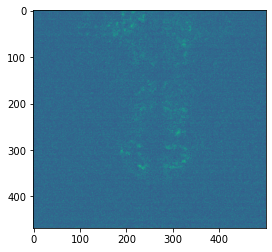

In [48]:
# check a random slice of a volume, make sure it looks as expected ... 
plt.imshow(dot2_volumes[5,10,:,:])

## calculate and write t-score and diff images 

### 1. 5 dot vs 2 dot 

In [54]:
# multiply difference image and t-score image by this constants before turning into integer and writing... 
T_SCALE = 1000
DIFF_SCALE = 100 

t_img = nu.get_t_score(dot2_volumes, dot5_volumes, absolute = True)*T_SCALE
diff = nu.get_diff(dot2_volumes, dot5_volumes, absolute = True)*DIFF_SCALE

tif.imsave('D:/Code/repos/numerosity_2/data/processed/img/20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1/20220113_ce03_dot2_vs_dot5_t_score.tif',
           t_img.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
tif.imsave('D:/Code/repos/numerosity_2/data/processed/img/20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1/20220113_ce03_dot2_vs_dot5_diff.tif',
           diff.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)

print(f'max t-image value : {t_img.max()}, diff image : {diff.max()}')

max t-image value : 611.4100295393093, diff image : 26944.0


### 2. 5 dot vs all blank

In [55]:
t_img = nu.get_t_score(blank_volumes, dot5_volumes, absolute = True)*T_SCALE
diff = nu.get_diff(blank_volumes, dot5_volumes, absolute = True)*DIFF_SCALE

tif.imsave('D:/Code/repos/numerosity_2/data/processed/img/20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1/20220113_ce03_dot5_vs_all_blank_t_score.tif',
           t_img.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
tif.imsave('D:/Code/repos/numerosity_2/data/processed/img/20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1/20220113_ce03_dot5_vs_all_blank_diff.tif',
           diff.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)

print(f'max t-image value : {t_img.max()}, diff image : {diff.max()}')

max t-image value : 549.6542067941302, diff image : 5697.499999999999


### 3. 2 dot vs all blank

In [56]:
t_img = nu.get_t_score(dot2_volumes, blank_volumes, absolute = True)*T_SCALE
diff = nu.get_diff(dot2_volumes, blank_volumes, absolute = True)*DIFF_SCALE

tif.imsave('D:/Code/repos/numerosity_2/data/processed/img/20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1/20220113_ce03_dot2_vs_all_blank_t_score.tif',
           t_img.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
tif.imsave('D:/Code/repos/numerosity_2/data/processed/img/20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1/20220113_ce03_dot2_vs_all_blank_diff.tif',
           diff.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)

print(f'max t-image value : {t_img.max()}, diff image : {diff.max()}')

max t-image value : 441.62819445918313, diff image : 26482.5


### 4. random shuffle of blanks 

In [57]:
np.random.seed(42)

split_memory = {}
for isplit in [1,2,3,4,5]:
    
    blank_group1 = np.random.choice(200, size=100, replace=False)
    blank_group2 = np.arange(200)[~blank_group1]

    t_img = nu.get_t_score(blank_volumes[blank_group1,:,:,:], blank_volumes[blank_group2,:,:,:])*T_SCALE
    diff = nu.get_diff(blank_volumes[blank_group1,:,:,:], blank_volumes[blank_group2,:,:,:])*DIFF_SCALE

    tif.imsave(f'D:/Code/repos/numerosity_2/data/processed/img/20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1/20220113_ce03_blank_vs_blank_random_split{isplit}_t_score.tif',t_img.astype(np.uint16),
               shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
    tif.imsave(f'D:/Code/repos/numerosity_2/data/processed/img/20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1/20220113_ce03_blank_vs_blank_random_split{isplit}_t_score.tif',t_img.astype(np.uint16),
               shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
    
    print(f'max t-image value : {t_img.max()}, diff image : {diff.max()}')

    split_memory[f'split{isplit} group1'] = blank_group1
    split_memory[f'split{isplit} group2'] = blank_group2
    

max t-image value : 281.78218526875, diff image : 2856.0
max t-image value : 301.39432637182273, diff image : 2706.0
max t-image value : 555.5393563662217, diff image : 3370.000000000002
max t-image value : 491.88109241524745, diff image : 4033.0
max t-image value : 568.5568068433865, diff image : 3141.9999999999986


In [58]:
import pandas as pd
split_df = pd.DataFrame.from_dict(split_memory)
split_df.to_csv('D:/Code/repos/numerosity_2/data/processed/img/20220113_ce03_abtl_h2bcamp7f_7dpf_2v5_2P_1/20220113_ce03_blank_split_info.csv',index=False)